### 1. Covid19 확진자 수 변동 추이 시각화

In [2]:
from hossam import load_data
from matplotlib import font_manager as fm
from matplotlib import pyplot as plt
import seaborn as sb

In [4]:
origin = load_data('covid19_active')
origin.head()

[data] https://data.hossam.kr/data/lab06/covid19_active.xlsx
[desc] 2022년 5월 1일부터 2023년 5월 31일까지 서울과 전국의 Covid19 일일 확진자 수를 기록한 데이터 (출처: 서울시)
[!] Cannot read metadata


,서울시 일일 확진,전국 일일 확진
기준일,,
2023-05-31,5987.0,24411.0
2023-05-30,3326.0,13529.0
2023-05-29,1393.0,6868.0
2023-05-28,1393.0,6868.0
2023-05-27,4078.0,17796.0


In [5]:
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"
#"./NotoSansKR-Regular.ttf"
    # ↑: 한글 지원하는 폰트파일의 경로
fm.fontManager.addfont(font_path)      
    # ↑: 폰트 글꼴 시스템에 등록
font_prop = fm.FontProperties(fname = font_path)
    # ↑: 폰의 속성 읽어오기
font_name = font_prop.get_name()
    # ↑: 읽어온 속성에서 폰트이름만 추출
    # why? 시스템이 인식하는 폰트 이름은 다 영문으로 
    # 되어있기 때문에 폰트 이름 확인은 필수임
font_name # 글꼴 이름 확인

'Noto Sans KR'

In [6]:
my_dpi = 120  # 1인치 당 점(픽셀) 수. 이미지 선명도를 결정함
my_font_name = 'Noto Sans KR'  # 시스템에 등록된 글꼴 이름
my_theme = 'dark'              # 그림 스타일 지전

sb.set_theme(style = my_theme) # seaborn 스타일 (화풍설정)

plt.rcParams['font.family'] = my_font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 16          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

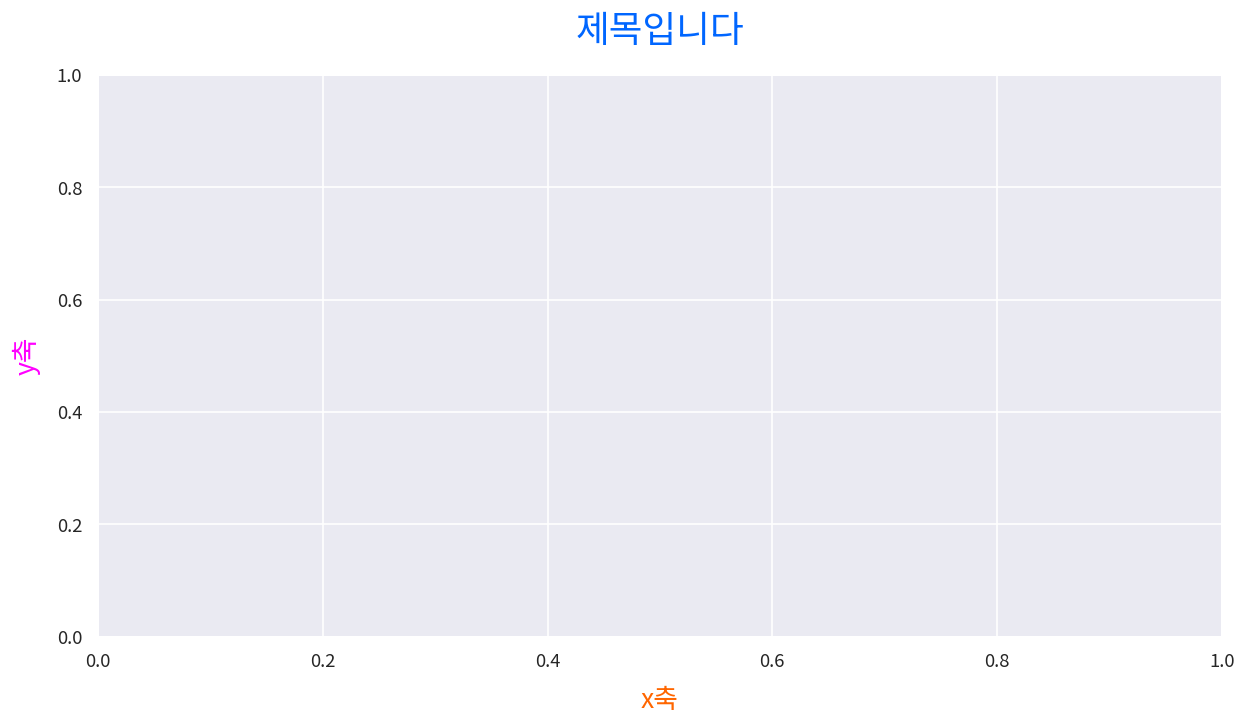

In [7]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280     # 그래프 가로크기
height_px = 760     # 그래프 세로크기
rows = 1            # 도화지의 행 수
cols = 1            # 도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 그래프의 도화지 상태 확인용 테스트 코드
#print(ax)

# 2) 그래프 그리기: seaborn 사용
# ...

# 3) 그래프 꾸미기: 도화지(ax)에 직접 적용
    # color: 글자 색상 (기본값: black)
    # fontsize: 글자 크기 (기본값: 위에서 정한 plt.rcParams['font_size] 설정)
    # pad, labelpad: 그래프와 글자 간 간격
    # fontweight: 글자 굵기 (100 ~ 1000 사이 100단위 값) 
        # 글꼴이 지원하는 경우만 적용됨
ax.set_title(
    "제목입니다", color = "#0066ff", 
    fontsize = 22, fontweight = 1000, pad = 20
)
ax.set_xlabel("x축", color = "#ff6600", fontsize = 16, labelpad = 10)
ax.set_ylabel("y축", color = "#ff00ff", fontsize = 16, labelpad = 10)

# 4) 출력
plt.grid()                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                      # 여백 제거
plt.savefig("myplot.png", dpi = my_dpi) # 생략가능
plt.show()                              # 그래프 화면 출력
plt.close()                             # 그래프 작업 종료
#-------------------------------------------------------
# ↑: 코드로 그림 그릴 때 마다 2~4는 적기 (3번은 생략 가능)
# ↑: 출력에서 저장 안할거면 다운로드 옵션 줄 지워도 됨

### 시계열 그리기
##### x 좌표 직접 생성

In [ ]:
x_index = origin.index.sort_values()
x = list(range(0, len(x_index), 30))
x

[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390]

##### x 좌표에 해당하는 날짜만 추출

In [17]:
xticks = []

for i in x:
    xticks.append(x_index[i].strftime('%y/%m/%d'))

print(xticks)

['23/05/31', '23/05/01', '23/04/01', '23/03/02', '23/01/31', '23/01/01', '22/12/02', '22/11/02', '22/10/03', '22/09/03', '22/08/04', '22/07/05', '22/06/05', '22/05/06']


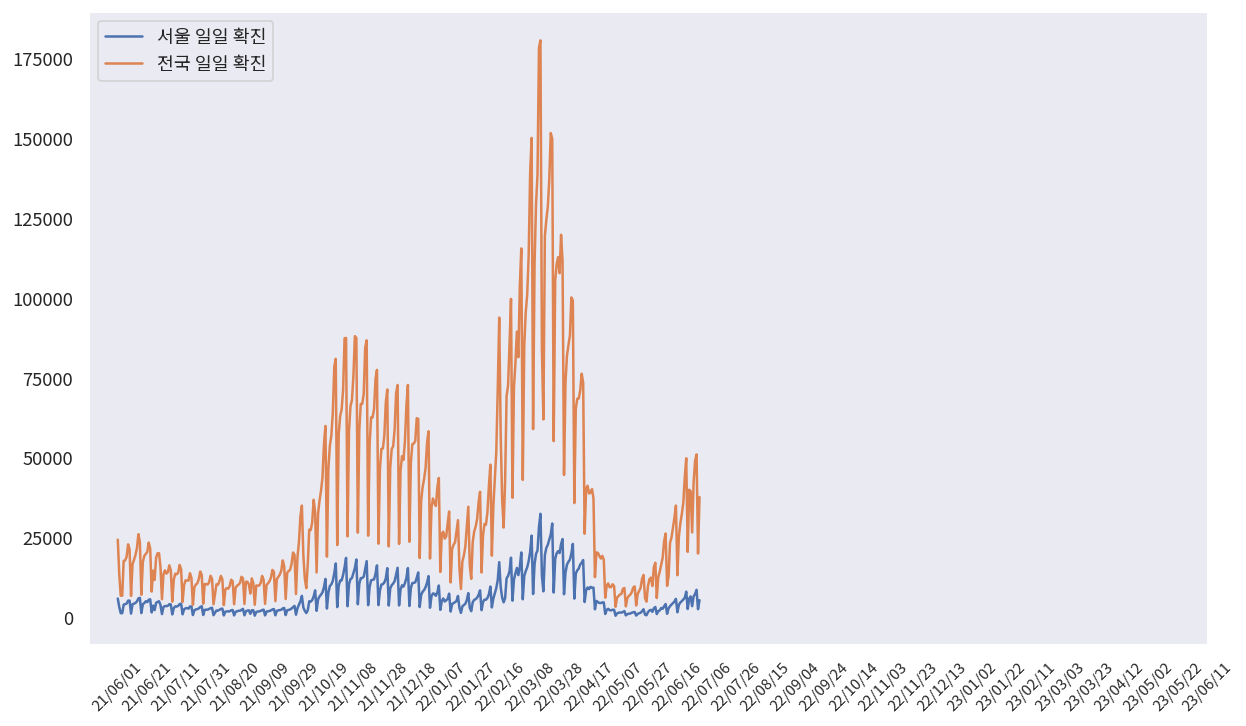

In [35]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280
height_px = 760     
rows = 1            
cols = 1            
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) 그래프 그리기: seaborn 사용
sb.lineplot(data = origin['서울시 일일 확진'].values, label = '서울 일일 확진')
sb.lineplot(data = origin['전국 일일 확진'].values, label = '전국 일일 확진')

# 3) 그래프 꾸미기: 
ax.grid(True)
ax.set_xticks(x, xticks, rotation = 45, fontsize = 9) # 글자 각도 지정
ax.legend(loc = 'upper left')

# 4) 출력
plt.grid()                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                      # 여백 제거
plt.savefig("myplot.png", dpi = my_dpi) # 생략가능
plt.show()                              # 그래프 화면 출력
plt.close()                             # 그래프 작업 종료


### 그래프 분석 (생각보다 시시콜콜 한 것 까지 다 적어야 됨)

#### 전반적 흐름
- 서울과 전국 모두 2022년 5월부터 2023년 5월까지 다중 파동(Multi-wave) 형태의 시계열 패턴을 보인다.
- 전국 확진자 규모가 서울 확진자보다 전 기간 동안 항상 절대적으로 크게 나타난다.
- 전체 기간 동안 (2022년 5~8월 → 2022년 9~12월 → 2023년 1월 → 2023년 4~5월) 여러 번의 증가와 감소가 반복된다.

#### 각 지역의 상대적 수준
- 전국 확진자 수는 대부분의 시점에서 서울보다 5~10배 이상 높게 나타난다.
- 2022년 8월, 2023년 1월 등의 주요 파동 구간에서 전국 확진자 변동 폭은 서울보다 훨씬 크며 스파이크가 두드러진다.
- 서울은 전국과 유사한 증감 시점을 공유하지만 규모와 변동 폭은 상대적으로 낮고 완만하다.

#### 초기 구간 (2022년 5~6월)
- 서울은 약 1천~5천 명 수준의 비교적 낮은 확진자 수가 반복된다.
- 전국은 같은 기간 약 5천~2만 명대 수준으로 서울보다 높은 상태에서 출발한다.

#### 첫 번째 큰 증가 구간 (2022년 7월~2022년 8월)
- 2022년 7월부터 서울·전국 모두 급격한 상승세를 보인다.
- 서울은 약 2만~3만 명대까지 증가하며 주요 파동을 형성한다.
- 전국은 같은 시기에 10만~18만 명대까지 급증하여 가장 큰 파동을 만든다.

#### 그 이후 감소 및 재상승 구간 (2022년 9~12월)
- 2022년 9~10월에는 큰 파동 이후 확진자 수가 전반적으로 감소한다.
- 이후 2022년 11~12월에 다시 소규모 재상승이 나타나며 전국은 약 3만~7만 명대 범위를 보인다.
- 이 재상승은 8월 파동보다 규모는 작지만 분명한 두 번째 파동을 형성한다.

#### 최댓값(가장 큰 피크) — (2022년 8월 10~20일)
- 전국 확진자는 2022년 8월 17일을 중심으로 약 18만 명 이상으로 최고점을 기록한다.
- 서울 확진자 수 역시 같은 시기에 약 3만 명대 중반으로 최고점을 기록한다.
- 전국의 최대 피크는 서울 최대 피크보다 약 5배 이상 높은 절대 규모를 보인다.

#### 피크 형태의 특징
- 2022년 8월 피크 구간에서 전국 확진자는 단기간 급등 후 급락하는 강한 스파이크 형태를 보인다.
- 서울은 동일한 시점에서도 전국보다 평탄하고 완만한 정점을 보인다.
- 해당 시기 전국의 단기 요동(weekly pattern)이 매우 크게 나타난다.

#### 요일 효과(Weekly pattern)
- 2022년 5월~2023년 5월 전체 기간 동안 서울·전국 모두 요일별 패턴으로 보이는 주기적 요동이 지속된다.
- 특히 2022년 7~8월, 2023년 1월 등 파동 구간에서 전국은 주 단위 반복 변동이 매우 뚜렷하다.
- 서울의 요동은 전국보다 상대적으로 작지만 동일한 패턴을 보인다.

#### 대규모 피크 후 구간 (2022년 9월~12월)
- 2022년 9월 이후 전국 확진자는 빠르게 하락하여 약 2만~4만 명대 수준으로 이동한다.
- 서울도 같은 기간 1천~5천 명대 사이에서 안정된다.
- 이후에도 전국은 서울보다 훨씬 높은 변동폭을 보이며 소규모 파동이 반복된다.

#### 그래프 말미 구간 (2023년 1~5월)
- 2023년 1월 초 전국 확진자는 약 8만 명대까지 다시 증가하는 중규모 파동을 보인다.
- 이후 2023년 4~5월에는 2만~5만 명대의 소규모 파동이 나타난다.
- 서울은 같은 기간 5천~1만 명 이하에서 변동하며 상대적으로 낮은 수준을 유지한다.

#### 서울과 전국의 동조성(Correlation)
- 전체 기간 동안 서울과 전국의 증감 방향은 대부분 동일하게 움직인다.
- 특히 2022년 7~8월, 2023년 1월 파동 구간에서 강한 동조화가 관찰된다.
- 주요 파동 시점은 항상 거의 동일한 날짜 범위에서 발생한다.

#### 변동성(Volatility)
- 전국 확진자는 전체 기간에서 높은 분산과 큰 변동성을 지속적으로 보인다.
- 서울 확진자는 전국보다 안정적이며 상대적으로 좁은 범위의 변동을 보인다.
- 전국의 단기 급등락(스파이크)은 서울보다 규모·빈도 모두 더 크다.#### 최댓값(가장 큰 피크) — (2022년 8월 초~중순)
- 전국 확진자는 2022년 8월경 그래프 전체에서 최대치(약 18만 명 이상)에 도달한다.
- 서울 확진자 수도 같은 시점에 약 3만 명대 중반으로 최고점을 기록한다.
- 전국의 최대 피크는 서울 최대 피크보다 약 5배 이상 높다.

#### 피크 형태의 특징
- 2022년 8월 피크 구간에서 전국 확진자는 단기간 급등 후 급락하는 강한 스파이크 형태를 보인다.
- 서울은 동일한 시점에서도 전국보다 평탄하고 완만한 정점을 보인다.
- 해당 시기 전국의 단기 요동(weekly pattern)이 매우 크게 나타난다.

#### 요일 효과(Weekly pattern)
- 전체 기간(2021년 말~2023년 중반)에 걸쳐 서울·전국 모두 요일별 패턴으로 보이는 주기적 요동이 지속적으로 나타난다.
- 특히 2022년 상·하반기 파동 구간에서 전국은 주 단위 반복적 감소·증가가 매우 뚜렷하다.
- 서울의 요동은 전국보다 상대적으로 작지만 같은 패턴이 존재한다.

#### 대규모 피크 후 구간 (2022년 9~12월)
- 2022년 9월 이후 전국 확진자는 빠르게 하락해 약 2만~4만 명대 수준으로 이동한다.
- 서울도 같은 기간 1천~5천 명대에서 안정되며 낮은 수준을 유지한다.
- 이 기간 중 전국은 간헐적으로 수만 명대의 작은 파동을 반복하며 서울보다 높은 변동폭을 유지한다.

#### 그래프 말미 구간 (2023년 1~6월)
- 2023년 초~중반 전국 확진자는 약 3만~5만 명대에서 작은 파동을 보인다.
- 서울은 같은 기간 약 5천~1만 명 이하 범위에서 움직인다.
- 마지막 시점까지도 두 지역 간 확진자 수의 절대적 차이는 크게 유지된다.

#### 서울과 전국의 동조성(Correlation)
- 전체 기간 동안 서울과 전국의 증감 방향은 대부분 동일하게 움직인다.
- 특히 2022년 1~3월, 7~9월의 대규모 파동 구간에서 강한 동조화가 관찰된다.
- 주요 파동 시점은 항상 거의 동일한 날짜 범위에서 발생한다.

#### 변동성(Volatility)
- 전국 확진자는 전체 기간에서 높은 분산과 큰 변동성을 지속적으로 보인다.
- 서울 확진자는 전국보다 안정적이며 상대적으로 좁은 범위의 변동을 한다.
- 전국의 단기 급등락(스파이크)은 서울보다 규모·빈도 모두 더 크다.


## 2. 비트코인 시세변동 추이 시각화

### 데이터 가져오기

In [23]:
df2 = load_data('bitcoin')
df2

[data] https://data.hossam.kr/data/lab06/bitcoin.xlsx
[desc] 2021년 06월 01일부터 2023년 06월 30일까지의 비트코인 시세 데이터 (출처: bitcoin.com)
[!] Cannot read metadata


,종가,시가,고가,저가,거래량,변동 %
날짜,,,,,,
2021-06-01,36687.6,37294.3,37850.3,35742.7,113.48K,-0.0164
2021-06-02,37555.8,36687.7,38199.9,35981.1,96.89K,0.0237
2021-06-03,39187.3,37555.7,39462.3,37193.6,106.44K,0.0434
2021-06-04,36851.3,39191.4,39255.4,35659.9,127.71K,-0.0596
2021-06-05,35520.0,36841.2,37887.6,34832.0,101.48K,-0.0361
...,...,...,...,...,...,...
2023-06-26,30267.0,30466.3,30645.9,29986.3,58.71K,-0.0065
2023-06-27,30689.1,30267.0,30993.7,30231.3,55.82K,0.0139
2023-06-28,30078.6,30691.9,30703.4,29919.5,51.06K,-0.0199


### 시가 확인

In [28]:
start = list(df2['시가'].values)

print(len(start))
print(start[:5])

760
[np.float64(37294.3), np.float64(36687.7), np.float64(37555.7), np.float64(39191.4), np.float64(36841.2)]


### 종가 확인

In [30]:
end = list(df2['종가'].values)

print(len(end))
print(end[:5])


760
[np.float64(36687.6), np.float64(37555.8), np.float64(39187.3), np.float64(36851.3), np.float64(35520.0)]


### 20일 간격 인덱스 생성

In [32]:
x = list(range(0, len(start), 20))

print(len(x))
print(x)

38
[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740]


### 20일 간격 라벨 추출하기

In [34]:
xticks = []

for i in x:
    xticks.append(df2.index[i].strftime('%y/%m/%d'))

xticks[:5]

['21/06/01', '21/06/21', '21/07/11', '21/07/31', '21/08/20']

### 시각화

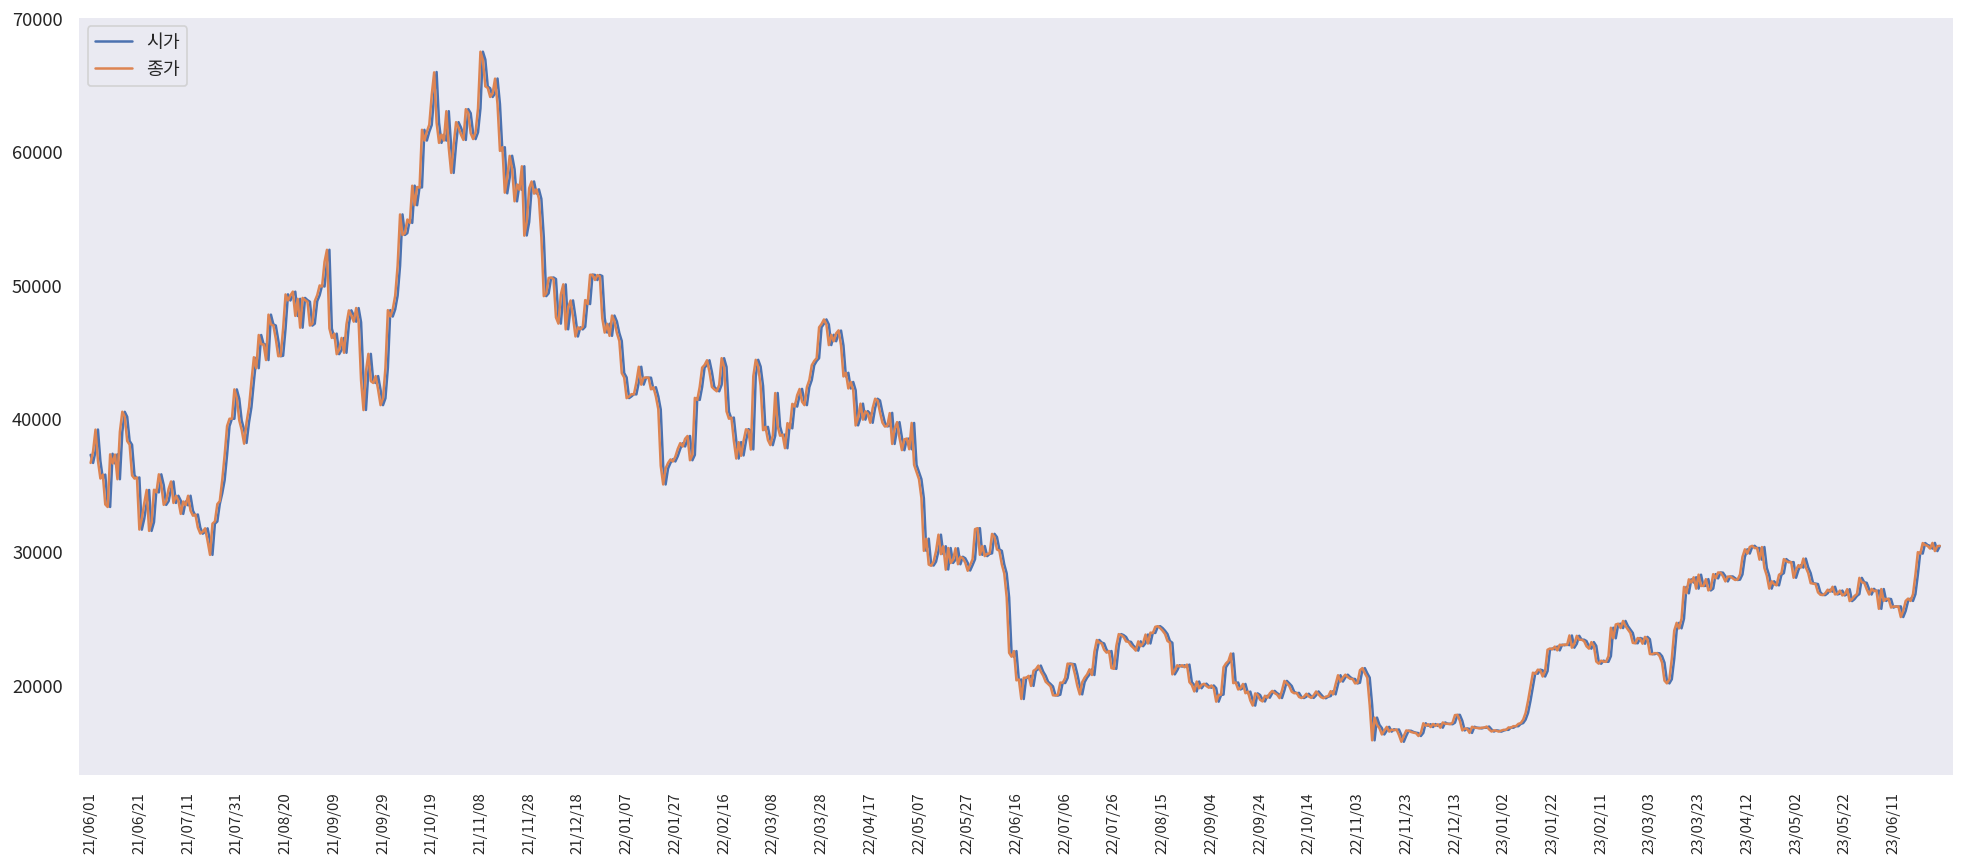

In [40]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 2000
height_px = 900
rows = 1            
cols = 1            
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) 그래프 그리기: seaborn 사용
sb.lineplot(data = start, label = '시가')
sb.lineplot(data = end, label = '종가')

# 3) 그래프 꾸미기: 
ax.grid(True)
ax.set_xticks(x, xticks, rotation = 90, fontsize = 9) # 글자 각도 지정
ax.legend(loc = 'upper left')
ax.set_xlim([-5, len(start) + 5])

# 4) 출력
plt.grid()                              # 배경 격자 표시/숨김 (테마별로 다름)
plt.tight_layout()                      # 여백 제거
#plt.savefig("myplot.png", dpi = my_dpi) # 생략가능
plt.show()                              # 그래프 화면 출력
plt.close()                             # 그래프 작업 종료


### 그래프 분석

#### 전체 기간 개요
- 데이터는 2021년 중반부터 2023년 중반까지 약 2년의 시계열로 구성되어 있다.
- 전체 기간 동안 가격은 여러 차례 큰 상승과 큰 하락이 반복되며, 단순한 단일 추세가 아닌 다중 파동 형태를 보인다.
- 시가와 종가는 기간 전체에서 거의 동일한 방향성을 가지며 동조적으로 움직인다.

#### 주요 시점별 흐름
- **2021년 중반~후반:** 그래프 초반부에서 비교적 높은 가격대가 유지되며, 그래프 상단 영역에 위치한다.
- **2021년 말~2022년 초:** 가격이 점진적으로 하락하며 전체적인 흐름이 아래쪽으로 이동한다.
- **2022년 중반:** 그래프에서 가장 낮은 구간 중 하나가 이 시점에 나타난다. 시가와 종가 모두 그래프의 하단부 근처에서 움직인다.
- **2022년 말~2023년 초:** 다시 완만한 반등 구간이 나타나며 그래프가 중간 높이까지 되돌아온다.
- **2023년 봄~초여름:** 가격이 다시 점진적으로 상승하여 중간~상단 영역에 위치하며 그래프 말미에서 회복 흐름이 보인다.

#### 가격 수준에 대한 대략적 사실
- 그래프 상단부(가장 높은 영역)는 전체 기간에서 일부 시점에만 나타나며, 이 구간은 **최고점에 가까운 가격대**로 보인다.
- 그래프 중간 영역은 전체 기간 중 가장 넓게 분포하며, **평균적인 가격 수준**이 이 근처에 위치한다.
- 그래프 하단부(가장 낮은 영역)는 몇 개의 특정 시점에서 짧게 나타나며, 이는 **연중 최저 수준의 가격대**에 해당한다.
- 시가와 종가 간의 차이는 하루 단위에서는 크게 벌어지지 않는 경우가 많지만, 특정 시기에는 하루 변동 폭이 확연히 넓어진다.

#### 상승 구간의 시점 및 특징
- **2021년 하반기 초입:** 20일 간격 점들이 그래프 상단으로 향하며 명확한 상승 흐름을 보인다.
- **2022년 말~2023년 1분기:** 저점에서부터 점들이 단계적으로 위쪽으로 배치되며 회복세를 형성한다.
- 상승 구간에서는 20일 단위 점의 위치 변화 폭이 커지며 기울기가 비교적 가파르게 나타난다.

#### 하락 구간의 시점 및 특징
- **2021년 말~2022년 중반:** 그래프에서 가장 분명한 하락 흐름이 나타나는 시기이며, 점들의 위치가 지속적으로 아래쪽으로 이동한다.
- 하락 구간에서는 시가와 종가 모두 이전 기간 대비 낮은 위치를 반복적으로 기록하며 장기간 하향 패턴이 지속된다.
- 일부 구간에서는 20일 간격 점 사이의 거리도 커져 급격한 가격 이동이 있었음을 보여준다.

#### 횡보(안정) 구간의 시점 및 특징
- **2022년 초~중반 일부 구간:** 시가와 종가 모두 일정한 높이에서 좁은 폭으로 움직이며 비교적 안정적인 패턴을 보인다.
- **2023년 초반 일부 기간:** 반등 이후 가격이 일정 범위 내에서 반복적으로 오르내리는 모습을 보인다.
- 횡보 구간에서는 20일 간격 점들의 높이가 비슷하게 유지된다.

#### 시가·종가 관계의 시점적 특징
- 거의 모든 시점에서 시가와 종가는 서로 가깝게 위치하여 하루 변동 폭이 지나치게 크지 않음을 보여준다.
- 특정 변동성 큰 기간(예: 하락 바닥 직전, 급등 직전)에는 시가와 종가의 일중 간격이 더 넓어지는 패턴이 나타난다.
- 두 선의 위치가 지속적으로 교차하거나 가까운 경우가 많아, 시가와 종가의 일별 패턴이 상당히 비슷한 구조를 가진다.

#### 변동성 측면에서의 시점별 특징
- **급격한 변동 시기:** 그래프 기울기가 급격하게 변하는 구간(2021년 말~2022년 중반, 일부 반등 구간)에서 변동 폭이 크다.
- **안정된 시기:** 그래프가 완만한 곡선을 그리며 점 차이가 작아지는 구간(2022년 중반 일부, 2023년 초 일부)에서 단기 변동성은 줄어든다.
- 전체적으로는 상승·하락·횡보가 모두 반복되며, 변동성 수준이 일정하지 않고 시기별로 크게 달라진다.

#### 전체 흐름 종합
- 최고점, 중간값, 최저점이 여러 번 반복되면서 다중 파동 구조가 뚜렷하게 나타난다.
- 시간 흐름에 따라 그래프 상단 → 하단 → 중간 → 상단으로 이동하는 모습이 나타나며, 전체 기간이 명확하게 여러 국면으로 구분된다.
- 시가와 종가 모두 동일한 흐름을 보이므로 단일 자산의 가격 움직임이 일관되게 반영된 그래프임을 확인할 수 있다.
